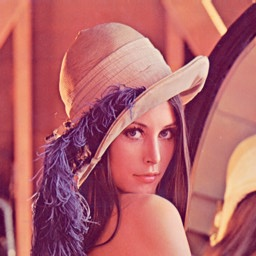

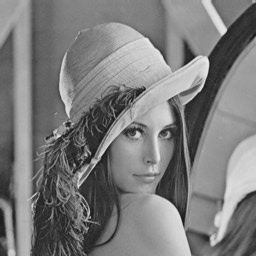

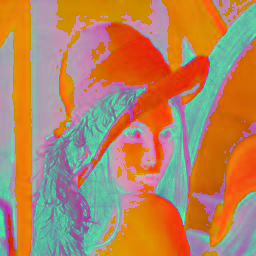

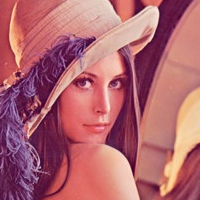

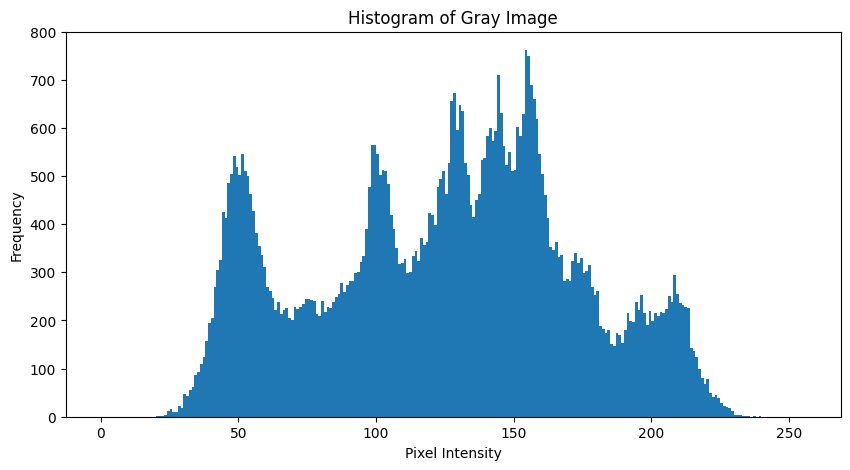

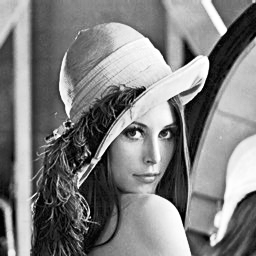

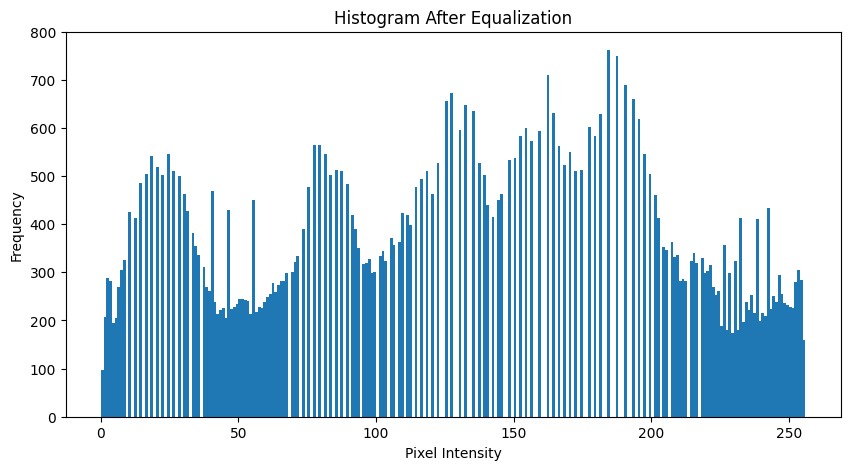

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/len_std.jpg')


cv2_imshow(image)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

cv2_imshow(gray)
cv2_imshow(hsv)


cropped = image_rgb[50:250, 50:250]
cv2_imshow(cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))


plt.figure(figsize=(10, 5))
plt.title("Histogram of Gray Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.show()


equalized = cv2.equalizeHist(gray)
cv2_imshow(equalized)

plt.figure(figsize=(10, 5))
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.hist(equalized.ravel(), bins=256, range=[0,256])
plt.show()


**Logarithmic Transformation**

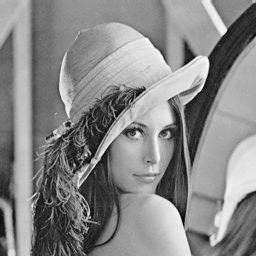

In [3]:

gray_float = gray / 255.0

c = 1
log_transformed = c * (np.log(1 + gray_float))


log_transformed = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX)
log_transformed = np.uint8(log_transformed)


cv2_imshow(log_transformed)


**Power-law**

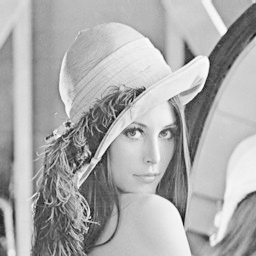

In [7]:

gamma = 0.1
c = 1


gray_float = gray / 255.0

# Apply gamma correction
gamma_transformed = c * np.power(gray_float, gamma)

# Normalize back to [0,255]
gamma_transformed = cv2.normalize(gamma_transformed, None, 0, 255, cv2.NORM_MINMAX)
gamma_transformed = np.uint8(gamma_transformed)

# Show result
cv2_imshow(gamma_transformed)


**Bit-plane Slicing**

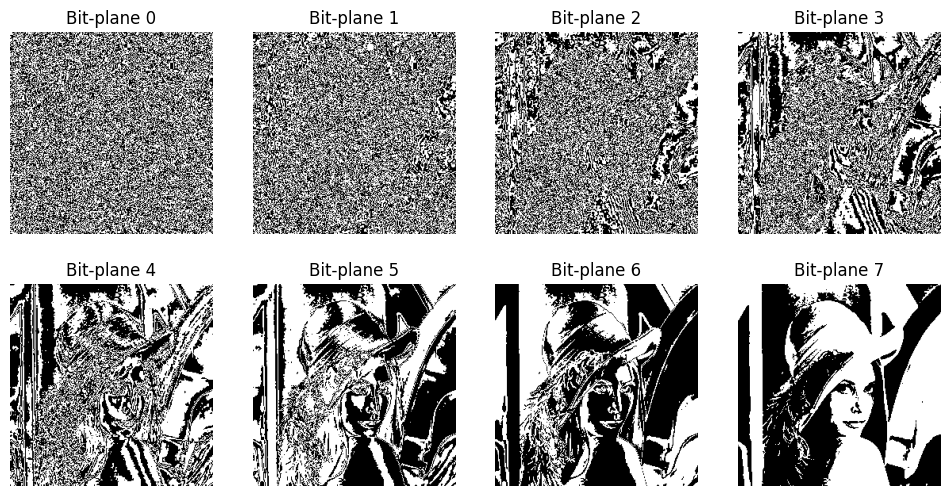

In [8]:


bit_planes = []
for i in range(8):

    plane = np.bitwise_and(gray, 1 << i)
    plane = np.where(plane > 0, 255, 0).astype(np.uint8)
    bit_planes.append(plane)


plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit-plane {i}')
    plt.axis('off')
plt.show()
